In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

dataset https://www.kaggle.com/datasets/ramjasmaurya/oyo-rental-price-prediction-in-china/code?select=rental_price.csv

In [12]:
df = pd.read_csv(r"D:\BrownUnivercity\DATA1030\finalproj\data\rentoyo.csv")
y=df['price']
X=df.loc[:,df.columns!='price']
print("feature matrix shape:",X.shape)
print("target varaiable shape:",y.shape)

feature matrix shape: (5834, 25)
target varaiable shape: (5834,)


### missing values

In [3]:
#count nan
# print(df.isnull().sum())
miss=df.isnull().sum(axis=0)/df.shape[0]
print("fraction of missing values in features:")
print(miss[miss>0])

frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

fraction of missing values in features:
bathrooms                      0.007885
bedrooms                       0.001028
beds                           0.003942
host_is_superhost              0.002571
host_listings_count            0.002571
review_scores_checkin          0.352588
review_scores_communication    0.352588
review_scores_location         0.352417
review_scores_rating           0.350703
review_scores_value            0.352588
dtype: float64
fraction of points with missing values: 0.35978745286253


### target variable

In [4]:
print(y.describe())

count     5834.000000
mean       286.219918
std        403.256199
min          0.000000
25%         95.000000
50%        175.000000
75%        325.000000
max      10000.000000
Name: price, dtype: float64


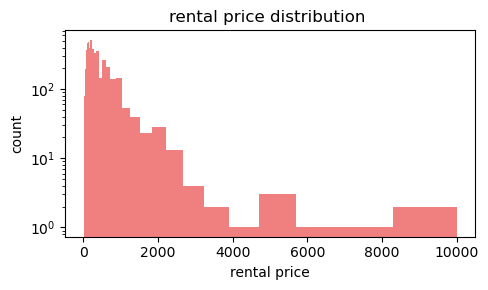

In [5]:
#log form
plt.figure(figsize=(5,3))
y.plot.hist(log=True,bins = np.logspace(np.log10(1),np.log10(np.max(df['price'])),50),color="lightcoral")

plt.xlabel('rental price')
plt.ylabel('count')
plt.title("rental price distribution ")

fig=plt.gcf()
plt.tight_layout()
plt.savefig("price.png")

### Exploratory Data Analysis

In [13]:
# drop worthless columns 
X_new=X.loc[:,(X.columns!='amenities')&(X.columns!='has_availability')]

count     5834.000000
mean       746.705862
std        641.901800
min          1.000000
25%         30.000000
50%       1125.000000
75%       1125.000000
max      26801.000000
Name: maximum_nights, dtype: float64


<AxesSubplot:ylabel='Frequency'>

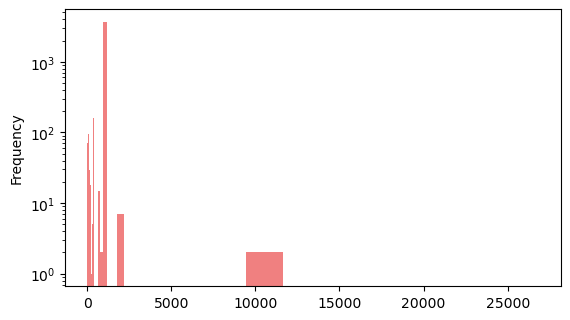

In [13]:
print(df['maximum_nights'].describe())
plt.figure(figsize=(6.4,3.6))
df['maximum_nights'].plot.hist(log=True,bins = np.logspace(np.log10(1),np.log10(np.max(df['maximum_nights'])),50),color="lightcoral")

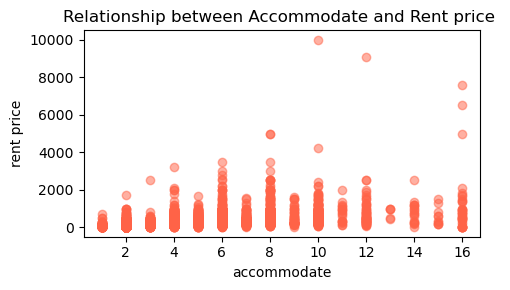

In [16]:
# numerical feature  scatter
plt.figure(figsize=(5,3))
X1=df['accommodates']
Y1=y

plt.xlabel("accommodate")
plt.ylabel("rent price")
plt.title("Relationship between Accommodate and Rent price ")

plt.scatter(X1,Y1,alpha=0.5,color="tomato")

fig=plt.gcf()
plt.tight_layout()
plt.savefig("acoomodate.png")

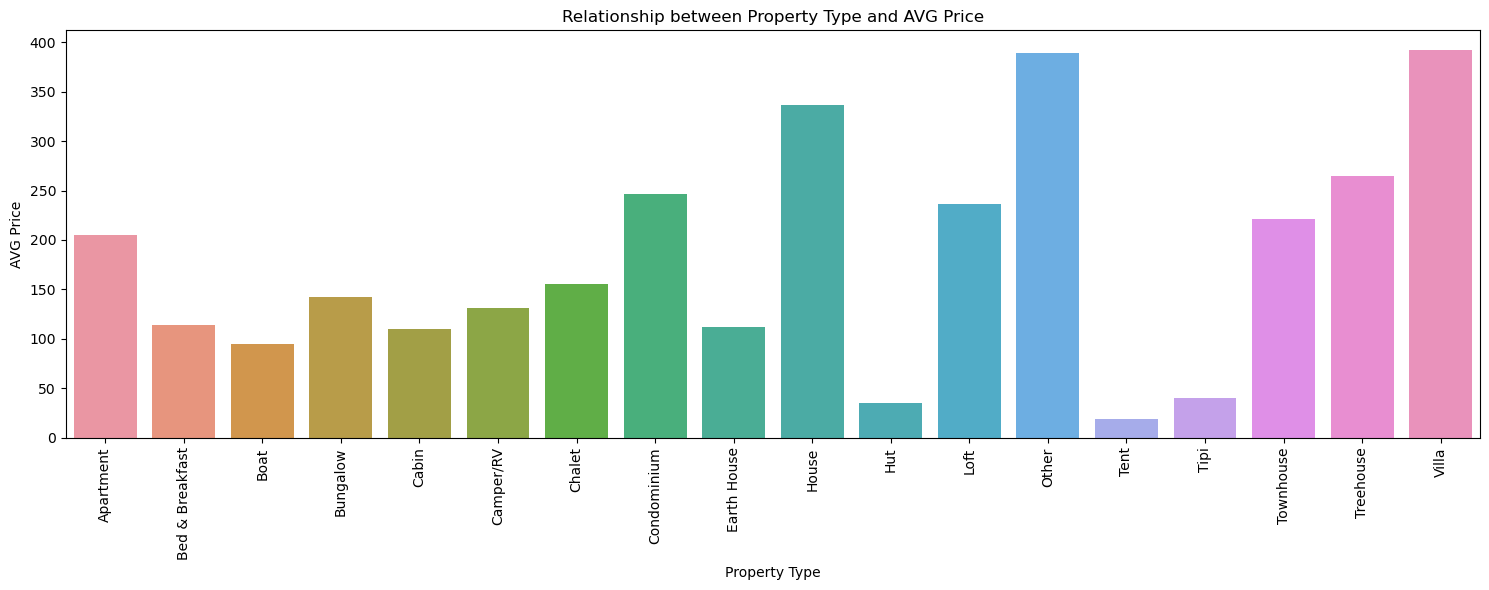

In [15]:
#property type & AVG price
plt.figure(figsize = (15,6))
df1=df[['property_type','price']]
df_group=df1.groupby('property_type')
property_type=df_group['price'].mean().reset_index().rename(columns={"property_type":"property_type","price":"avg price"})

ax = sns.barplot(data=property_type,x='property_type',y='avg price')
plt.xlabel("Property Type")
plt.ylabel("AVG Price")
ax.set(title='Relationship between Property Type and AVG Price')
g = ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

fig=plt.gcf()
plt.tight_layout()
plt.savefig("property.png")

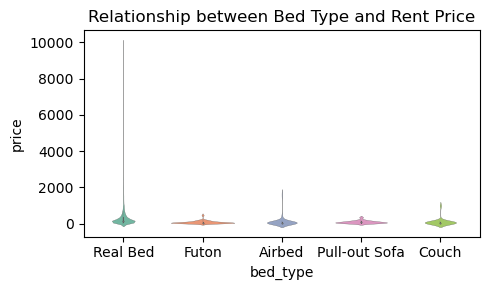

In [18]:
#categorical  violin
import seaborn as sns
plt.figure(figsize=(5,3))
sns.violinplot(x=df['bed_type'],y=df['price'],linewidth=0.2,palette="Set2").set(title='Relationship between Bed Type and Rent Price')

fig=plt.gcf()
plt.tight_layout()
plt.savefig("bedtype.png") 

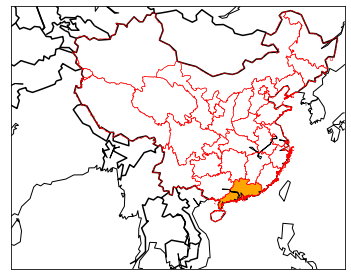

In [3]:
#latitude longitude basemap
#china
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
ax = plt.gca()

# plot map
m = Basemap(llcrnrlon=82.33, 
            llcrnrlat=3.01, 
            urcrnrlon=138.16, 
            urcrnrlat=53.123,
            projection='lcc', lat_0 = 42.5,lon_0=120)
m.drawcoastlines()    # coastline
m.drawcountries(linewidth=1.5)    # country border
# CHN_adm1  province data of China
m.readshapefile(shapefile='data/gadm41_CHN_shp/gadm41_CHN_1',
                name='states',
                drawbounds=True,color='r')  

for info, shp in zip(m.states_info, m.states):
    proid = info['NAME_1']
    if proid == 'Guangdong':
        poly = Polygon(shp,facecolor='orange',lw=3)
        ax.add_patch(poly)

fig=plt.gcf()
plt.tight_layout()
plt.savefig("china.png")

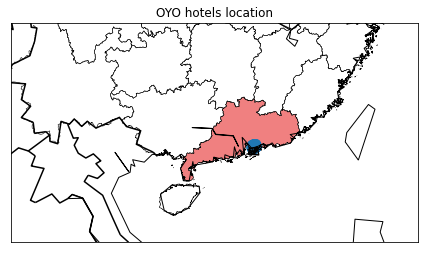

In [4]:
#latitude longitude basemap
#guangdong & oyos catter
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
ax = plt.gca()

# plot map
m = Basemap(llcrnrlon=100.33, 
            llcrnrlat=15.01, 
            urcrnrlon=125.16, 
            urcrnrlat=30.12,
            projection='lcc', lat_0 = 42.5,lon_0=120)
m.drawcoastlines()    # coastline
m.drawcountries(linewidth=1.5)    # country border
# CHN_adm1  province data of China
m.readshapefile(shapefile='D:\BrownUnivercity\DATA1030\midproject\data\gadm41_CHN_shp/gadm41_CHN_1',
                name='states',
                drawbounds=True)  

lon=df['longitude(East)']
lat=df['latitude(North)']

for info, shp in zip(m.states_info, m.states):
    proid = info['NAME_1']
    if proid == 'Guangdong':
        poly = Polygon(shp,facecolor='lightcoral',lw=3)
        ax.add_patch(poly)

lon, lat = m(lon, lat)  
m.scatter(lon, lat, s=60)

plt.title('OYO hotels location')

fig=plt.gcf()
plt.tight_layout()
plt.savefig("guangdong.png")

### Method ML_pipe_KFold_RMSE

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [4]:
#regression problem
nr_states = 10 #loop 10 times


final_models = []

def MLpipe_KFold_RMSE(X,y,preprocessor,reg,param_grid):
    test_scores = np.zeros(nr_states)
    for i in range(nr_states):
        
        X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=42*i)
        kf = KFold(n_splits=4,shuffle=True,random_state=42*i)
        pipe = make_pipeline(preprocessor,reg)
        grid = GridSearchCV(pipe, param_grid=param_grid,scoring = 'neg_mean_squared_error',
                        cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
        grid.fit(X_other, y_other)
        results = pd.DataFrame(grid.cv_results_)
        
        print('best model parameters:',grid.best_params_)
        print('validation score:',grid.best_score_) 
    # save the model
        final_models.append(grid)
    # calculate and save the test score
        y_test_pred = final_models[-1].predict(X_test)
        test_scores[i] = np.sqrt(mean_squared_error(y_test,y_test_pred))
        print('RMSE test score:',test_scores[i])     
    return test_scores,y_test

In [5]:
#read data
#preprocessor
# collect the various features
cat_ftrs = ['bed_type','host_is_superhost', 'instant_bookable', 'room_type']

ordinal_ftrs = ['cancellation_policy','property_type']
ordinal_cats = [['no_refunds','super_strict_30','strict','moderate','flexible'],
               ['Hut','Condominium', 'Apartment', 'Cabin', 'Villa', 'Boat', 'Tipi', 'Townhouse', 'Loft', 'Camper/RV', 'Bungalow', 'Chalet', 'Other', 'Tent', 'Bed & Breakfast', 'Treehouse', 'Earth House', 'House']]              

num_ftrs1 = ['accommodates', 'availability_30', 'calculated_host_listings_count',
       'guests_included', 'number_of_reviews','bathrooms', 'bedrooms', 'beds', 'host_listings_count',
        'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value']
num_ftrs2 = ['maximum_nights']

# one-hot encoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

# ordinal encoder
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='constant',fill_value='NA')),
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

# MinMax Scaler
numeric_transformer1 = Pipeline(steps=[
    ('imputer3',SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler(feature_range=(0,100)))])

# Standard scaler
numeric_transformer2 = Pipeline(steps=[
    ('imputer4',SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num1', numeric_transformer1, num_ftrs1),
        ('cat', categorical_transformer, cat_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs),
        ('num2', numeric_transformer2, num_ftrs2)])

In [27]:
# L1 regularized linear regression 
reg = Lasso(random_state=42)
param_grid = {'lasso__alpha':  [0.25,2.5,25] } 
L1_c,y_test = MLpipe_KFold_RMSE(X_new,y,preprocessor,reg,param_grid)

Fitting 4 folds for each of 3 candidates, totalling 12 fits
best model parameters: {'lasso__alpha': 0.25}
validation score: -95544.89204288769
RMSE test score: 332.5048195343838
Fitting 4 folds for each of 3 candidates, totalling 12 fits
best model parameters: {'lasso__alpha': 0.25}
validation score: -99120.16158444743
RMSE test score: 321.14850380149824
Fitting 4 folds for each of 3 candidates, totalling 12 fits
best model parameters: {'lasso__alpha': 0.25}
validation score: -108367.86935505274
RMSE test score: 249.33466630590902
Fitting 4 folds for each of 3 candidates, totalling 12 fits
best model parameters: {'lasso__alpha': 0.25}
validation score: -90777.64584320017
RMSE test score: 369.3208920924873
Fitting 4 folds for each of 3 candidates, totalling 12 fits
best model parameters: {'lasso__alpha': 2.5}
validation score: -105068.33369778495
RMSE test score: 298.2728792391288
Fitting 4 folds for each of 3 candidates, totalling 12 fits
best model parameters: {'lasso__alpha': 0.25}
v

In [12]:
L1_c

array([332.50481953, 321.1485038 , 249.33466631, 369.32089209,
       298.27287924, 349.18486624, 364.13289666, 258.50704218,
       229.58742343, 337.10134802])

In [29]:
# y_test

In [14]:
print('test scores mean',np.mean(L1_c))
print('test scores standard deviation',np.std(L1_c))

test scores mean 310.9095337515326
test scores standard deviation 47.198807526529805


In [17]:
#RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
param_grid = {'randomforestregressor__max_features':  [3,5,7,9] , 
               'randomforestregressor__max_depth':  [3,5,7,9]} 
ran_c=MLpipe_KFold_RMSE(X_new,y,preprocessor,reg,param_grid)


Fitting 4 folds for each of 16 candidates, totalling 64 fits
best model parameters: {'randomforestregressor__max_depth': 9, 'randomforestregressor__max_features': 7}
validation score: -81654.734316264
RMSE test score: 307.10369092624916
Fitting 4 folds for each of 16 candidates, totalling 64 fits
best model parameters: {'randomforestregressor__max_depth': 9, 'randomforestregressor__max_features': 3}
validation score: -93287.08835230021
RMSE test score: 305.09515619169105
Fitting 4 folds for each of 16 candidates, totalling 64 fits
best model parameters: {'randomforestregressor__max_depth': 9, 'randomforestregressor__max_features': 5}
validation score: -94111.43843602226
RMSE test score: 215.86303582933243
Fitting 4 folds for each of 16 candidates, totalling 64 fits
best model parameters: {'randomforestregressor__max_depth': 9, 'randomforestregressor__max_features': 7}
validation score: -79966.11391162813
RMSE test score: 344.76157885883003
Fitting 4 folds for each of 16 candidates, tot

In [18]:
ran_c

array([307.10369093, 305.09515619, 215.86303583, 344.76157886,
       292.34805259, 336.76020741, 360.37117433, 239.62375777,
       218.45557428, 299.79961715])

In [107]:
print('test scores mean',np.mean(ran_c))
print('test scores standard deviation',np.std(ran_c))

test scores mean 292.01818453333726
test scores standard deviation 48.858289905085414


In [19]:
# SVR
reg = SVR(kernel='rbf')
param_grid = {'svr__gamma':  [0.1, 10, 100],
             'svr__C':[0.1,1,10]} 
SVR_c=MLpipe_KFold_RMSE(X,y,preprocessor,reg,param_grid)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
best model parameters: {'svr__C': 10, 'svr__gamma': 0.1}
validation score: -166525.97989233583
RMSE test score: 457.0633809705048
Fitting 4 folds for each of 9 candidates, totalling 36 fits
best model parameters: {'svr__C': 10, 'svr__gamma': 0.1}
validation score: -170334.21140706414
RMSE test score: 439.1388000674527
Fitting 4 folds for each of 9 candidates, totalling 36 fits
best model parameters: {'svr__C': 10, 'svr__gamma': 0.1}
validation score: -186566.7821397371
RMSE test score: 352.79752267955473
Fitting 4 folds for each of 9 candidates, totalling 36 fits
best model parameters: {'svr__C': 10, 'svr__gamma': 0.1}
validation score: -155341.4636547502
RMSE test score: 502.45544361279406
Fitting 4 folds for each of 9 candidates, totalling 36 fits
best model parameters: {'svr__C': 10, 'svr__gamma': 0.1}
validation score: -177387.0667796479
RMSE test score: 409.21875057487097
Fitting 4 folds for each of 9 candidates, totallin

In [20]:
SVR_c

array([457.06338097, 439.13880007, 352.79752268, 502.45544361,
       409.21875057, 442.50978551, 495.11179577, 357.68006883,
       299.07785263, 460.71044277])

In [109]:
print('test scores mean',np.mean(SVR_c))
print('test scores standard deviation',np.std(SVR_c))

test scores mean 421.57638434199333
test scores standard deviation 62.81576114486148


In [21]:
#KNN
reg = KNeighborsRegressor(weights='uniform', n_jobs=-1)
param_grid = {'kneighborsregressor__n_neighbors': [5,25,50]} 
KNN_c=MLpipe_KFold_RMSE(X,y,preprocessor,reg,param_grid)

Fitting 4 folds for each of 3 candidates, totalling 12 fits
best model parameters: {'kneighborsregressor__n_neighbors': 25}
validation score: -97837.39904624899
RMSE test score: 318.20838074445317
Fitting 4 folds for each of 3 candidates, totalling 12 fits
best model parameters: {'kneighborsregressor__n_neighbors': 25}
validation score: -97934.67639351051
RMSE test score: 320.60138961510484
Fitting 4 folds for each of 3 candidates, totalling 12 fits
best model parameters: {'kneighborsregressor__n_neighbors': 5}
validation score: -107215.98674764574
RMSE test score: 265.89838553669273
Fitting 4 folds for each of 3 candidates, totalling 12 fits
best model parameters: {'kneighborsregressor__n_neighbors': 25}
validation score: -89323.79802146624
RMSE test score: 371.56958459771005
Fitting 4 folds for each of 3 candidates, totalling 12 fits
best model parameters: {'kneighborsregressor__n_neighbors': 25}
validation score: -101742.06876999035
RMSE test score: 289.9438183088109
Fitting 4 folds

In [22]:
KNN_c

array([318.20838074, 320.60138962, 265.89838554, 371.5695846 ,
       289.94381831, 335.33792052, 384.54992622, 252.862433  ,
       222.87348307, 338.97971562])

In [111]:
print('test scores mean',np.mean(KNN_c))
print('test scores standard deviation',np.std(KNN_c))

test scores mean 310.0825037242632
test scores standard deviation 49.20667904497913


### Results

In [23]:
allscores=np.r_[L1_c,ran_c,SVR_c,KNN_c]#array 行合并 （列合并 np.c_）
print(allscores)

[332.50481953 321.1485038  249.33466631 369.32089209 298.27287924
 349.18486624 364.13289666 258.50704218 229.58742343 337.10134802
 307.10369093 305.09515619 215.86303583 344.76157886 292.34805259
 336.76020741 360.37117433 239.62375777 218.45557428 299.79961715
 457.06338097 439.13880007 352.79752268 502.45544361 409.21875057
 442.50978551 495.11179577 357.68006883 299.07785263 460.71044277
 318.20838074 320.60138962 265.89838554 371.5695846  289.94381831
 335.33792052 384.54992622 252.862433   222.87348307 338.97971562]


In [24]:
print('test scores mean',np.mean(allscores))
print('test scores standard deviation',np.std(allscores))

test scores mean 333.64665158778155
test scores standard deviation 73.34642083766414


In [30]:
# baseline
from sklearn.metrics import mean_squared_error
y_mean=np.mean(y_test)
y_std=np.std(y_test,ddof=0)
#create full y_mean ndarray 
array=np.full((len(y_test),1),y_mean)
y_pred1=pd.DataFrame(array)

print("baseline RMSE:", np.sqrt(mean_squared_error(y_test, y_pred1)))

baseline RMSE: 445.7852569807543


In [31]:
# test scores of different models
test_temp = {'model':['Lasso','RandomForest','SVR','KNeighbor'],
             'test_score':[np.mean(L1_c),np.mean(ran_c),np.mean(SVR_c),np.mean(KNN_c)]}
test_data = pd.DataFrame.from_dict(test_temp)
# test_data

In [74]:
base=np.full((len(test_data)),445.78)
error=(test_data['test_score'].values-base)/73.34
error
# error=(test_data['test_score'].values-basel)/73.34
# error #Series

array([-1.83897554, -2.09656143, -0.3300193 , -1.8502522 ])

[]

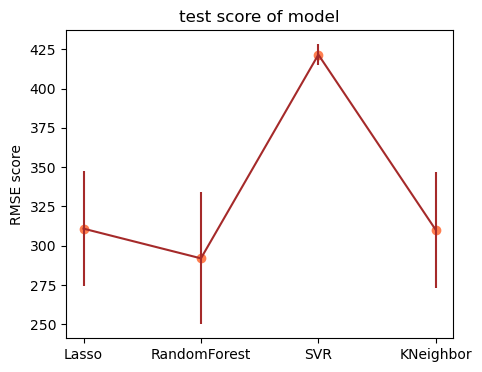

In [82]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(5,4))
# plt.plot(test_data['model'], test_data['test_score'], c='brown')
plt.scatter(test_data['model'], test_data['test_score'],c='coral')
plt.errorbar(test_data['model'], test_data['test_score'],yerr=-error*20,c='brown')
plt.ylabel('RMSE score')
plt.title('test score of model')
plt.plot()

errorbar https://vimsky.com/examples/usage/matplotlib-pyplot-errorbar-in-python.html

In [16]:
# the best model is RandomForestRegressor
'''
best model parameters: {'randomforestregressor__max_depth': 9, 'randomforestregressor__max_features': 5}
validation score: -94111.43843602226
RMSE test score: 215.8630358293324
'''
import pickle
import time

pickle.dump(reg,open("reg.dat","wb"))
start=time.time()
random_state=30
#split
X_train, X_other, y_train, y_other = train_test_split(X_new,y,test_size = 0.2,random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,test_size = 0.5,random_state=random_state)


# fit_transform the training set
X_prep = preprocessor.fit_transform(X_train)

#the feature names after fit
feature_names = preprocessor.get_feature_names_out()

#transform the train
df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print(df_train.shape)

#transform the val
df_val = preprocessor.transform(X_val)
df_val = pd.DataFrame(data=df_val,columns = feature_names)
print(df_val.shape)

#transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)

#fit model
reg = RandomForestRegressor(random_state=42,max_features=9,max_depth=5)
reg.fit(df_train,y_train)

y_test_pred = reg.predict(df_test)
test_scores = np.sqrt(mean_squared_error(y_test,y_test_pred))

end=time.time()

print('running time',end-start)
print('test scores mean',np.mean(test_scores))
print('test scores standard deviation',np.std(test_scores))


loaded_model = pickle.load(open("reg.dat","rb"))

(4667, 30)
(583, 30)
running time 0.49090123176574707
test scores mean 202.72660072854498
test scores standard deviation 0.0


In [25]:
data=pd.DataFrame()
data['y_true']=y_test
data['y_pred']=y_test_pred

[Text(0.5, 0, 'house sample'),
 Text(0, 0.5, 'price'),
 Text(0.5, 1.0, 'House price predict')]

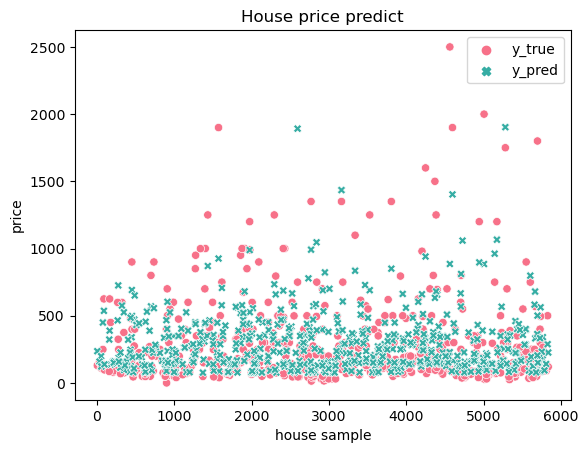

In [32]:
import seaborn as sns
ax=sns.scatterplot(data=data,palette="husl")
ax.set(xlabel='house sample', ylabel='price',title='House price predict')

- ### Global

In [69]:
# G1 shuffling
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

test_score=r2_score(y_test,y_test_pred)
nr_runs = 10
ftr_names=df_test.columns
scores = np.zeros([len(ftr_names),nr_runs])


for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    r2_scores = []
    for j in range(nr_runs):
        X_test_shuffled = df_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(df_test[ftr_names[i]].values)
        y_test_pred=reg.predict(X_test_shuffled)
        r2_scores.append(r2_score(y_test,y_test_pred))
    print('   shuffled test score:',np.around(np.mean(r2_scores),3),'+/-',np.around(np.std(r2_scores),3))
    scores[i] = r2_scores
    

shuffling num1__accommodates
   shuffled test score: 0.536 +/- 0.013
shuffling num1__availability_30
   shuffled test score: 0.547 +/- 0.005
shuffling num1__calculated_host_listings_count
   shuffled test score: 0.579 +/- 0.001
shuffling num1__guests_included
   shuffled test score: 0.576 +/- 0.002
shuffling num1__number_of_reviews
   shuffled test score: 0.538 +/- 0.009
shuffling num1__bathrooms
   shuffled test score: 0.468 +/- 0.009
shuffling num1__bedrooms
   shuffled test score: 0.42 +/- 0.018
shuffling num1__beds
   shuffled test score: 0.557 +/- 0.007
shuffling num1__host_listings_count
   shuffled test score: 0.58 +/- 0.001
shuffling num1__review_scores_checkin
   shuffled test score: 0.576 +/- 0.002
shuffling num1__review_scores_communication
   shuffled test score: 0.581 +/- 0.002
shuffling num1__review_scores_location
   shuffled test score: 0.58 +/- 0.001
shuffling num1__review_scores_rating
   shuffled test score: 0.579 +/- 0.001
shuffling num1__review_scores_value
   shuf

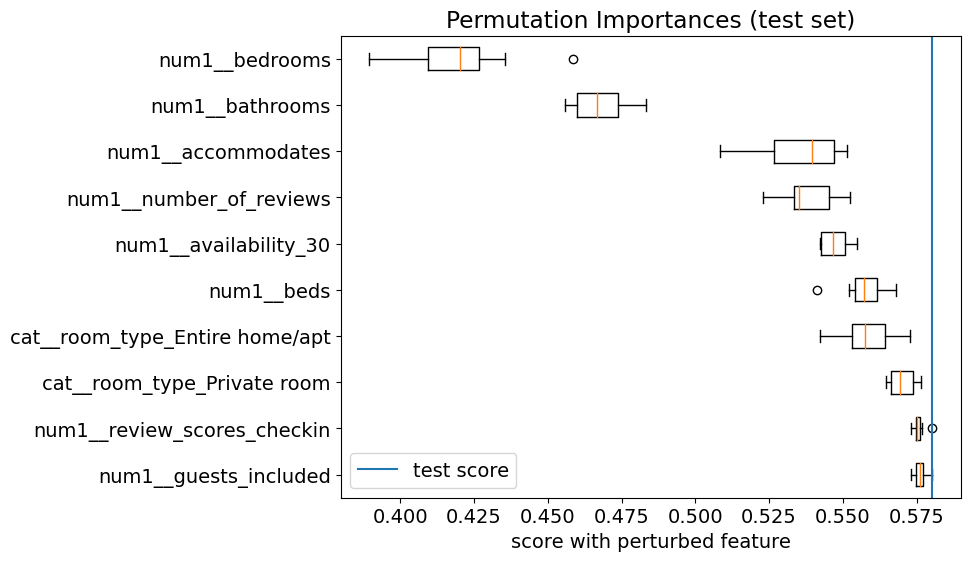

In [70]:
#plot 
#The smaller the R2, the more important the features are
import matplotlib.pylab as plt
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))

sorted_indcs = np.argsort(np.mean(scores,axis=1))[::1]
sorted_indcs = np.array(sorted_indcs)[9::-1] #top 10

plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')

plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.show()

# fig=plt.gcf()
# plt.tight_layout()
# plt.savefig("Permutation Importances ")

In [86]:
#G2 shap.global
import shap
shap.initjs() 

# create the explainer object with RandomForestRegressor
# model = grid.best_estimator_
explainer = shap.TreeExplainer(reg)

(584, 30)


Text(0.5, 1.0, 'feature importance')

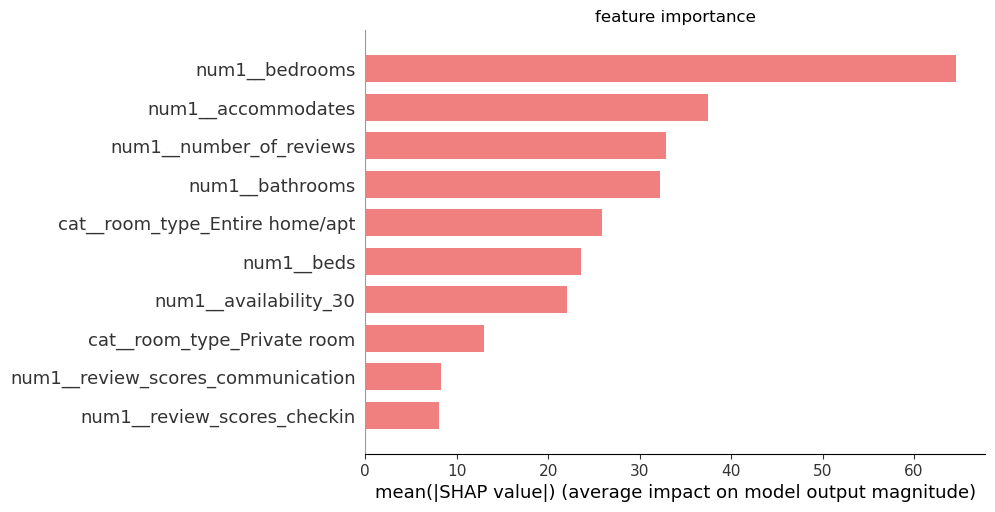

In [94]:
shap_values = explainer.shap_values(df_test)
print(np.shape(shap_values))
#Global features impotances
shap.summary_plot(shap_values, df_test, max_display=10, plot_type='bar',color='lightcoral',show=False)
plt.title('feature importance')

In [101]:
#G3 Randomforest SKlearn important features
# importances = reg.feature_importances_
importances = np.sort(reg.feature_importances_)[::-1]
loc=np.argsort(reg.feature_importances_)[::-1]
index_name=[]
for i in loc:
    index_name.append(ftr_names[i])    

Text(0.5, 1.0, 'RandomForest feature impotance')

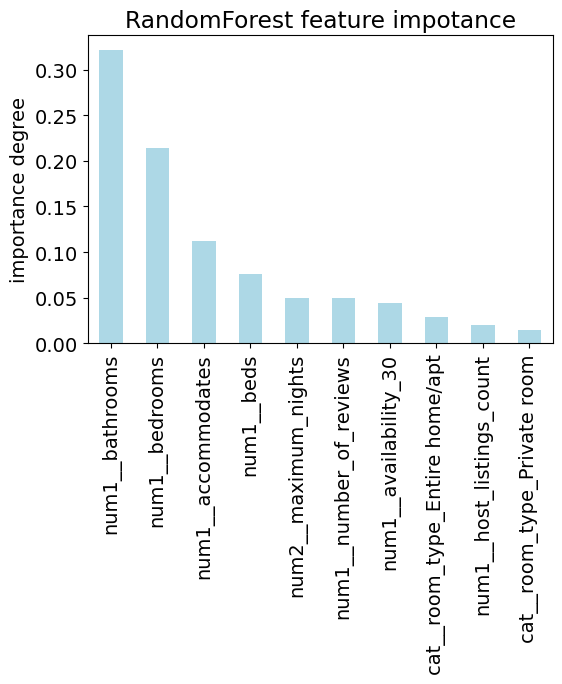

In [110]:
plt.figure(figsize=(6,4))
forest_importances = pd.Series(importances[:10], index=index_name[:10])
forest_importances.plot.bar(color='lightblue')
plt.ylabel('importance degree')
plt.title('RandomForest feature impotance')

- ### Local

In [89]:
#point 0
shap.force_plot(explainer.expected_value, shap_values[0,:], df_test.iloc[0,:])

In [90]:
#point 
shap.force_plot(explainer.expected_value, shap_values[20,:], df_test.iloc[20,:])